<a href="https://colab.research.google.com/github/Bagusalfarizi/KI/blob/main/Task/MidtermTask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **Nama :Bagus Al Farizi** \\
 **NPM :2206048700** \\

 <font color="#4863A0">**Kelas Komputasi Intelegensia**


hands-on prompts choosing YOLO

Prompt :
1. In Google Colab, install the libraries necessary for real-time object detection using YOLO and video processing using OpenCV. Explain the roles of each library

Install the libraries required for YOLO object detection and OpenCV for handling video input and output. Include PyTorch for running the YOLO model, and ensure that GPU acceleration is enabled in Google Colab to enhance performance.



In [1]:
# Install PyTorch with GPU support
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

# Install YOLOv5 dependencies and OpenCV for video processing
!pip install opencv-python opencv-python-headless
!pip install yolov5  # This installs the YOLOv5 model and dependencies


Looking in indexes: https://download.pytorch.org/whl/cu118


/content/drive/MyDrive/Semester5/KI/Dataset/Vid1/videoplayback.mp4

Prompt :
2. Since Google Colab doesn't support direct webcam input, upload a video file and load the pre-trained YOLOv5 model for object detection

Explain how to upload a video file and mount Google Drive in Colab. Load the YOLOv5 model for detecting objects in the video frames. Discuss the architecture of YOLO and how it processes each frame, detecting multiple objects and outputting bounding boxes and class labels.



In [2]:
import torch
import cv2
from yolov5 import YOLOv5
import pandas as pd

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [14]:
# Specify the path to your video file in Google Drive
video_file = '/content/drive/MyDrive/Semester 5/KI/Dataset/Vid1/videoplayback.mp4'
cap = cv2.VideoCapture(video_file)

source : https://youtu.be/Y1jTEyb3wiI?si=UpozEfOH07jQisDf

In [4]:
# Get frame dimensions from the first frame
ret, frame = cap.read()
if ret:
    frame_height, frame_width = frame.shape[:2]
cap.release()  # Release the frame, we'll reopen for processing

In [5]:
# Load YOLOv5 model (small version)
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)
model.conf = 0.25  # Set confidence threshold to 0.25
# Display the loaded model architecture
print(model)


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2024-10-29 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

100%|██████████| 14.1M/14.1M [00:00<00:00, 115MB/s] 

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

Prompt :
3. Detect objects frame by frame using YOLOv5 and extract relevant information (bounding boxes, class labels)

Process each frame using YOLOv5, extracting bounding boxes and object classifications. Discuss how YOLO handles multiple detections in real time, and how to structure the extracted data (bounding boxes, labels) for later use.



In [15]:
import warnings

# Suppress specific warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# List to store all detections
detections = []

# Process each frame
frame_number = 0
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break  # Exit if the video ends

    # Check if frame was loaded correctly
    if frame_number % 10 == 0:  # Print status every 10 frames
        print(f"Processing frame {frame_number}, frame shape: {frame.shape}")

    # Run YOLO inference on the frame
    results = model(frame)

    # Convert to list format if results are non-empty
    for detection in results.pandas().xyxy[0].itertuples(index=False):
        detections.append({
            'frame': frame_number,
            'label': detection.name,
            'confidence': detection.confidence,
            'xmin': int(detection.xmin),
            'ymin': int(detection.ymin),
            'xmax': int(detection.xmax),
            'ymax': int(detection.ymax)
        })

    frame_number += 1

# Release resources
cap.release()

# Convert detections to a DataFrame for further analysis or storage
df_detections = pd.DataFrame(detections)
print("Final Detection Data (first 5 rows):")
print(df_detections.head())  # Print only the first 5 rows of the final detections


Processing frame 0, frame shape: (1080, 1920, 3)
Processing frame 10, frame shape: (1080, 1920, 3)
Processing frame 20, frame shape: (1080, 1920, 3)
Processing frame 30, frame shape: (1080, 1920, 3)
Processing frame 40, frame shape: (1080, 1920, 3)
Processing frame 50, frame shape: (1080, 1920, 3)
Processing frame 60, frame shape: (1080, 1920, 3)
Processing frame 70, frame shape: (1080, 1920, 3)
Processing frame 80, frame shape: (1080, 1920, 3)
Processing frame 90, frame shape: (1080, 1920, 3)
Processing frame 100, frame shape: (1080, 1920, 3)
Processing frame 110, frame shape: (1080, 1920, 3)
Processing frame 120, frame shape: (1080, 1920, 3)
Processing frame 130, frame shape: (1080, 1920, 3)
Processing frame 140, frame shape: (1080, 1920, 3)
Processing frame 150, frame shape: (1080, 1920, 3)
Processing frame 160, frame shape: (1080, 1920, 3)
Processing frame 170, frame shape: (1080, 1920, 3)
Processing frame 180, frame shape: (1080, 1920, 3)
Processing frame 190, frame shape: (1080, 

In [16]:
df_detections

frame   label  confidence  xmin  ymin  xmax  ymax
0         0     bus    0.609697  1063   397  1378   792
1         0   truck    0.561462  1248    42  1379   165
2         0  person    0.394208  1816     0  1861    39
3         1   truck    0.649873  1257    52  1392   176
4         1   truck    0.444335  1066   434  1395   841
...     ...     ...         ...   ...   ...   ...   ...
8104    715     car    0.441767   984    65  1017    97
8105    715     car    0.392136  1163    87  1203   117
8106    715     car    0.331135  1149    76  1188   104
8107    715     car    0.278500  1145    63  1184    96
8108    715   truck    0.263057   133   120   252   189

[8109 rows x 7 columns]

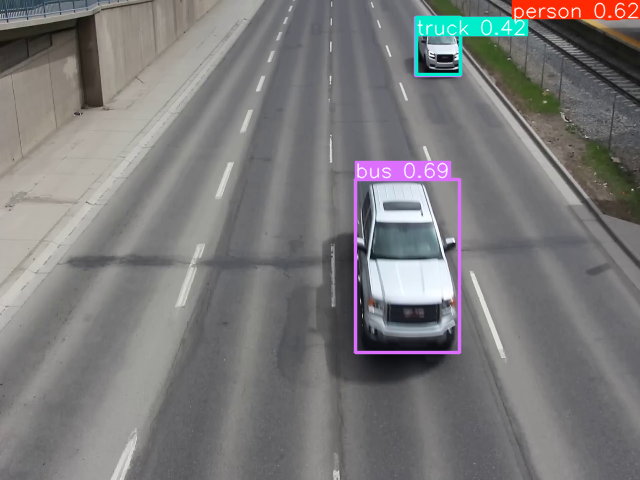

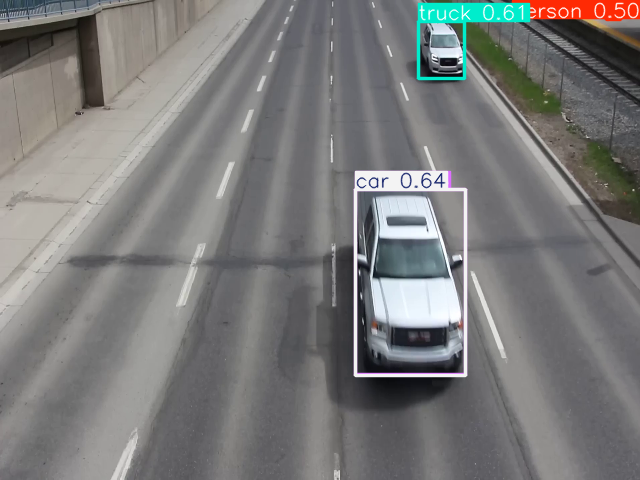

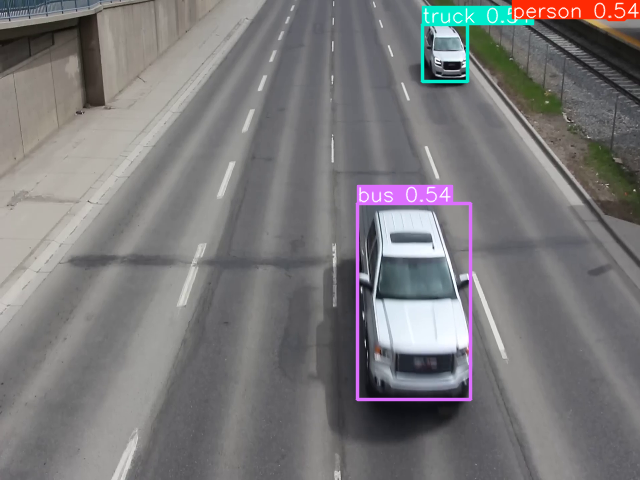

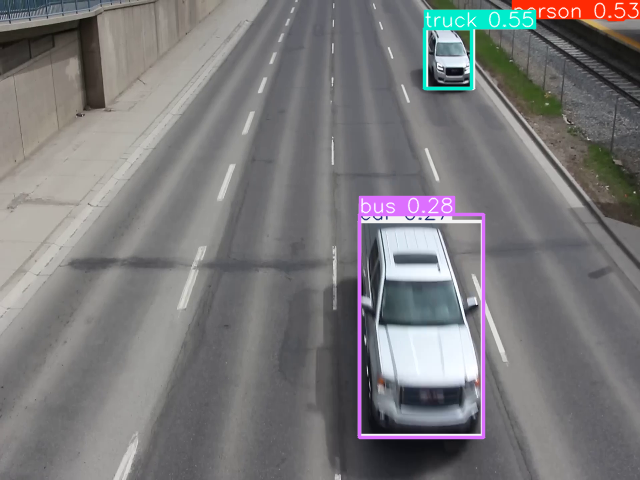

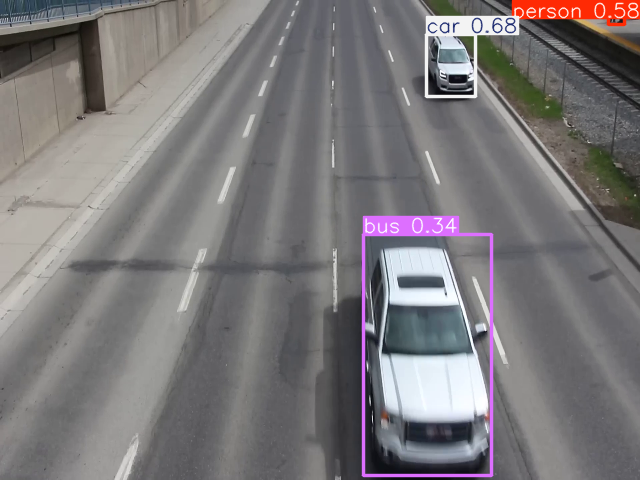

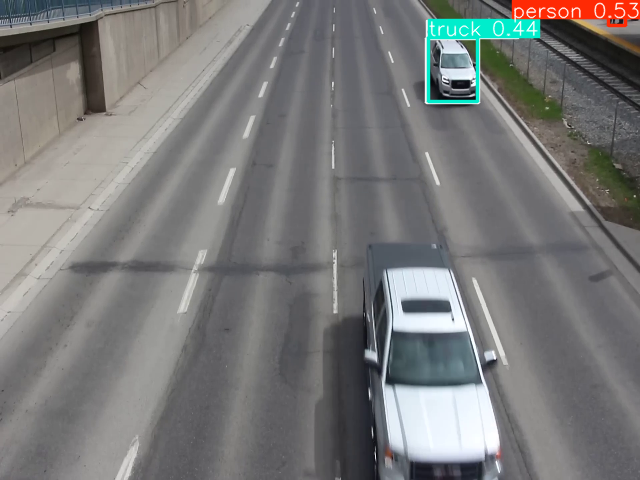

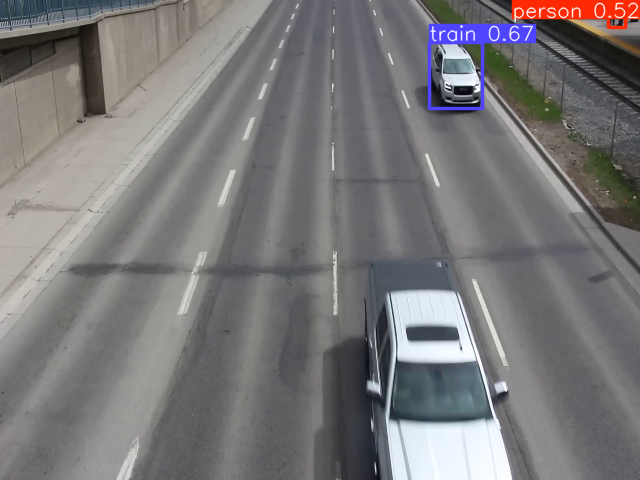

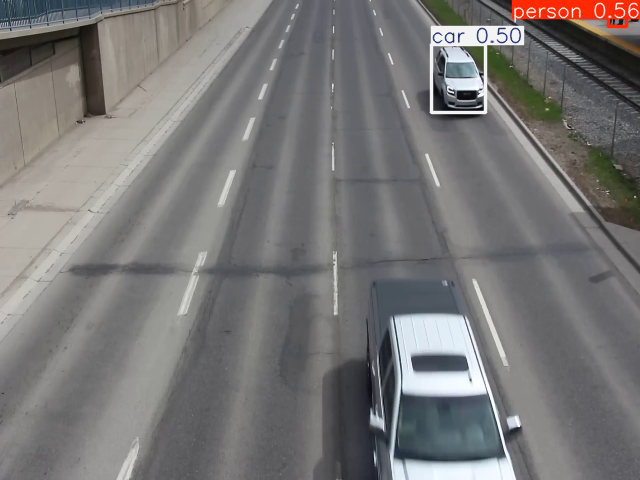

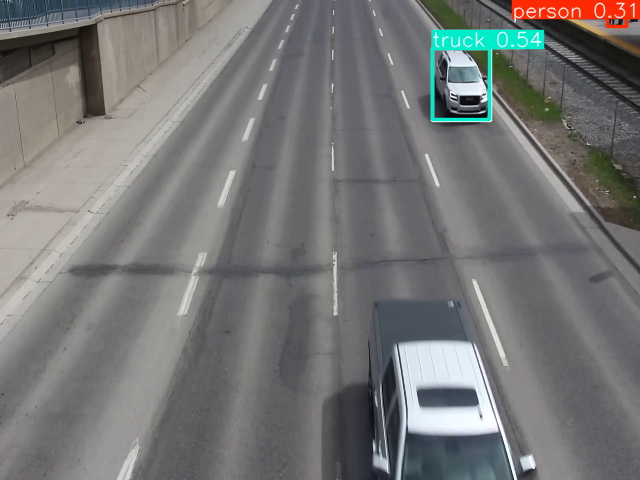

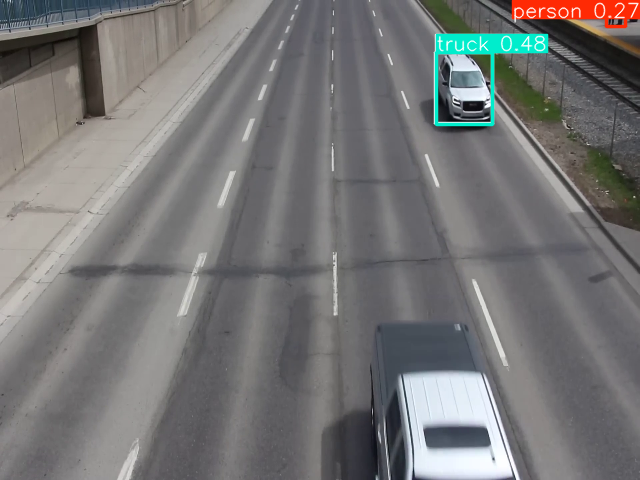

In [17]:
from google.colab.patches import cv2_imshow
import cv2

# Open the video file
cap = cv2.VideoCapture(video_file)

# Check if video opened successfully
if not cap.isOpened():
    print("Error: Unable to open the video file.")
else:
    # Set a limit on the number of frames to display
    max_frames = 10
    frame_count = 0

    # Loop through video frames
    while cap.isOpened() and frame_count < max_frames:
        ret, frame = cap.read()

        # Check if frame is read correctly
        if not ret or frame is None:
            print("Error: Failed to read the frame. Exiting loop.")
            break

        # Resize frame for faster processing (optional)
        frame_resized = cv2.resize(frame, (640, 480))  # Adjust as needed

        # Use YOLOv5 to detect objects in the resized frame
        results = model(frame_resized)

        # Convert detections to OpenCV format
        frame_with_boxes = results.render()[0]

        # Display the frame with bounding boxes using cv2_imshow (for Colab)
        cv2_imshow(frame_with_boxes)

        # Break loop if the 'q' key is pressed
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

        # Increment frame count
        frame_count += 1

    # Release video capture object
    cap.release()


Prompt:

4. Preprocess the object detection results and store them for further analysis

Explain how to preprocess the YOLO output by normalizing coordinates and converting the data into a structured format suitable for tracking and further analysis. Highlight the importance of maintaining consistent object identifiers across frames to facilitate effective tracking.



In [ ]:
# Ensure frame dimensions are defined before normalization
# These should match the frame dimensions from the previous cell
frame_height = df_detections['ymax'].max()  # Use max values as a reference for dimensions
frame_width = df_detections['xmax'].max()   # This is a simple placeholder; set your actual frame width/height

# Normalize bounding box coordinates and add them to the DataFrame
df_detections['xmin_norm'] = df_detections['xmin'] / frame_width
df_detections['ymin_norm'] = df_detections['ymin'] / frame_height
df_detections['xmax_norm'] = df_detections['xmax'] / frame_width
df_detections['ymax_norm'] = df_detections['ymax'] / frame_height

print("Normalized Detection Data:")
print(df_detections.head())

# Save to CSV for analysis (optional)
output_path = '/content/drive/MyDrive/Semester 5/KI/Dataset/normalized_detections.csv'
df_detections.to_csv(output_path, index=False)
print(f"Detection data saved to {output_path}")


Normalized Detection Data:
   frame   label  confidence  xmin  ymin  ...  ymax  xmin_norm  ymin_norm  \
0      0     bus    0.609697  1063   397  ...   792   0.553646   0.367593   
1      0   truck    0.561462  1248    42  ...   165   0.650000   0.038889   
2      0  person    0.394208  1816     0  ...    39   0.945833   0.000000   
3      1   truck    0.649873  1257    52  ...   176   0.654687   0.048148   
4      1   truck    0.444335  1066   434  ...   841   0.555208   0.401852   

   xmax_norm  ymax_norm  
0   0.717708   0.733333  
1   0.718229   0.152778  
2   0.969271   0.036111  
3   0.725000   0.162963  
4   0.726562   0.778704  

[5 rows x 11 columns]
Detection data saved to /content/drive/MyDrive/Semester 5/KI/Dataset/normalized_detections.csv


https://drive.google.com/file/d/18h7LAlmiryX5ba1hth9HgRRWcdszXFNi/view?usp=sharing

Prompt:

5. Implement object tracking using YOLOv5 output and explain the significance of tracking objects over multiple frames

Track objects across frames, focusing on the need to maintain identity consistency. This ensures that objects can be followed and tracked accurately as they move across multiple frames. Discuss various object tracking methods and their importance in real-time video applications.


In [ ]:
import cv2
import pandas as pd

# Load normalized detections
df_detections = pd.read_csv('/content/drive/MyDrive/Semester 5/KI/Dataset/normalized_detections.csv')

# Initialize video
video_file = '/content/drive/MyDrive/Semester 5/KI/Dataset/Vid1/videoplayback.mp4'
cap = cv2.VideoCapture(video_file)
frame_width, frame_height = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))

# Define output video file path and codec
output_file = '/content/drive/MyDrive/Semester 5/KI/Dataset/output_tracked_video.mp4'
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_file, fourcc, fps, (frame_width, frame_height))

# Function to calculate IOU
def calculate_iou(box1, box2):
    x1, y1, x2, y2 = max(box1['xmin_norm'], box2['xmin_norm']), max(box1['ymin_norm'], box2['ymin_norm']), min(box1['xmax_norm'], box2['xmax_norm']), min(box1['ymax_norm'], box2['ymax_norm'])
    inter_area = max(0, x2 - x1) * max(0, y2 - y1)
    box1_area = (box1['xmax_norm'] - box1['xmin_norm']) * (box1['ymax_norm'] - box1['ymin_norm'])
    box2_area = (box2['xmax_norm'] - box2['xmin_norm']) * (box2['ymax_norm'] - box2['ymin_norm'])
    iou = inter_area / (box1_area + box2_area - inter_area)
    return iou

# Initialize tracking state
tracked_objects = {}
next_object_id = 0

# Frame-by-frame processing
frame_number = 0
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Retrieve detections for current frame
    frame_data = df_detections[df_detections['frame'] == frame_number]
    current_objects = []

    # Object matching and tracking
    for _, row in frame_data.iterrows():
        new_object = {
            'xmin_norm': row['xmin_norm'],
            'ymin_norm': row['ymin_norm'],
            'xmax_norm': row['xmax_norm'],
            'ymax_norm': row['ymax_norm']
        }

        matched_id = None
        max_iou = 0.0

        # Compare with previously tracked objects
        for obj_id, prev_object in tracked_objects.items():
            iou = calculate_iou(prev_object, new_object)
            if iou > 0.5 and iou > max_iou:  # IOU threshold for matching
                matched_id = obj_id
                max_iou = iou

        # Update or assign new ID
        if matched_id is not None:
            tracked_objects[matched_id] = new_object  # Update position
            new_object['id'] = matched_id
        else:
            new_object['id'] = next_object_id
            tracked_objects[next_object_id] = new_object
            next_object_id += 1

        # Draw bounding box on the frame
        x_min = int(new_object['xmin_norm'] * frame_width)
        y_min = int(new_object['ymin_norm'] * frame_height)
        x_max = int(new_object['xmax_norm'] * frame_width)
        y_max = int(new_object['ymax_norm'] * frame_height)
        cv2.rectangle(frame, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)
        cv2.putText(frame, f"ID: {new_object['id']}", (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

        current_objects.append(new_object)

    # Write frame to the output video
    out.write(frame)
    frame_number += 1

# Release resources
cap.release()
out.release()

print(f"Tracking video saved to {output_file}")


Tracking video saved to /content/drive/MyDrive/Semester 5/KI/Dataset/output_tracked_video.mp4


https://drive.google.com/file/d/1-3CR_VWMBHrEJv-VMI1oC86DzC7XQ0RT/view?usp=sharing

In [ ]:
import cv2
import pandas as pd

# Load normalized detections
df_detections = pd.read_csv('/content/drive/MyDrive/Semester 5/KI/Dataset/normalized_detections.csv')

# Initialize video
video_file = '/content/drive/MyDrive/Semester 5/KI/Dataset/Vid1/videoplayback.mp4'
cap = cv2.VideoCapture(video_file)
frame_width, frame_height = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))

# Define output video file path and codec
output_file = '/content/drive/MyDrive/Semester 5/KI/Dataset/output_tracked_video_with_labels.mp4'
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_file, fourcc, fps, (frame_width, frame_height))

# Function to calculate IOU
def calculate_iou(box1, box2):
    x1, y1, x2, y2 = max(box1['xmin_norm'], box2['xmin_norm']), max(box1['ymin_norm'], box2['ymin_norm']), min(box1['xmax_norm'], box2['xmax_norm']), min(box1['ymax_norm'], box2['ymax_norm'])
    inter_area = max(0, x2 - x1) * max(0, y2 - y1)
    box1_area = (box1['xmax_norm'] - box1['xmin_norm']) * (box1['ymax_norm'] - box1['ymin_norm'])
    box2_area = (box2['xmax_norm'] - box2['xmin_norm']) * (box2['ymax_norm'] - box2['ymin_norm'])
    iou = inter_area / (box1_area + box2_area - inter_area)
    return iou

# Initialize tracking state
tracked_objects = {}
next_object_id = 0

# Frame-by-frame processing
frame_number = 0
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Retrieve detections for current frame
    frame_data = df_detections[df_detections['frame'] == frame_number]
    current_objects = []

    # Object matching and tracking
    for _, row in frame_data.iterrows():
        new_object = {
            'xmin_norm': row['xmin_norm'],
            'ymin_norm': row['ymin_norm'],
            'xmax_norm': row['xmax_norm'],
            'ymax_norm': row['ymax_norm'],
            'label': row['label']  # Add label for display
        }

        matched_id = None
        max_iou = 0.0

        # Compare with previously tracked objects
        for obj_id, prev_object in tracked_objects.items():
            iou = calculate_iou(prev_object, new_object)
            if iou > 0.5 and iou > max_iou:  # IOU threshold for matching
                matched_id = obj_id
                max_iou = iou

        # Update or assign new ID
        if matched_id is not None:
            tracked_objects[matched_id] = new_object  # Update position
            new_object['id'] = matched_id
        else:
            new_object['id'] = next_object_id
            tracked_objects[next_object_id] = new_object
            next_object_id += 1

        # Draw bounding box on the frame
        x_min = int(new_object['xmin_norm'] * frame_width)
        y_min = int(new_object['ymin_norm'] * frame_height)
        x_max = int(new_object['xmax_norm'] * frame_width)
        y_max = int(new_object['ymax_norm'] * frame_height)
        cv2.rectangle(frame, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)

        # Display ID and label
        label_text = f"ID: {new_object['id']} Label: {new_object['label']}"
        cv2.putText(frame, label_text, (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

        current_objects.append(new_object)

    # Write frame to the output video
    out.write(frame)
    frame_number += 1

# Release resources
cap.release()
out.release()

print(f"Tracking video with labels saved to {output_file}")


Tracking video with labels saved to /content/drive/MyDrive/Semester 5/KI/Dataset/output_tracked_video_with_labels.mp4


https://drive.google.com/file/d/1-CalPlKrT-9ED4KpQ3tOeSoiL8TCxOJz/view?usp=sharing

In [ ]:
import cv2
import pandas as pd
import random

# Load normalized detections
df_detections = pd.read_csv('/content/drive/MyDrive/Semester 5/KI/Dataset/normalized_detections.csv')

# Initialize video
video_file = '/content/drive/MyDrive/Semester 5/KI/Dataset/Vid1/videoplayback.mp4'
cap = cv2.VideoCapture(video_file)
frame_width, frame_height = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))

# Define output video file path and codec
output_file = '/content/drive/MyDrive/Semester 5/KI/Dataset/output_tracked_video_with_colored_labels.mp4'
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_file, fourcc, fps, (frame_width, frame_height))

# Function to calculate IOU
def calculate_iou(box1, box2):
    x1, y1, x2, y2 = max(box1['xmin_norm'], box2['xmin_norm']), max(box1['ymin_norm'], box2['ymin_norm']), min(box1['xmax_norm'], box2['xmax_norm']), min(box1['ymax_norm'], box2['ymax_norm'])
    inter_area = max(0, x2 - x1) * max(0, y2 - y1)
    box1_area = (box1['xmax_norm'] - box1['xmin_norm']) * (box1['ymax_norm'] - box1['ymin_norm'])
    box2_area = (box2['xmax_norm'] - box2['xmin_norm']) * (box2['ymax_norm'] - box2['ymin_norm'])
    iou = inter_area / (box1_area + box2_area - inter_area)
    return iou

# Initialize tracking state and label color dictionary
tracked_objects = {}
next_object_id = 0
label_colors = {}

# Function to generate random color
def get_random_color():
    return (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))

# Frame-by-frame processing
frame_number = 0
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Retrieve detections for current frame
    frame_data = df_detections[df_detections['frame'] == frame_number]
    current_objects = []

    # Object matching and tracking
    for _, row in frame_data.iterrows():
        new_object = {
            'xmin_norm': row['xmin_norm'],
            'ymin_norm': row['ymin_norm'],
            'xmax_norm': row['xmax_norm'],
            'ymax_norm': row['ymax_norm'],
            'label': row['label']  # Add label for display
        }

        matched_id = None
        max_iou = 0.0

        # Compare with previously tracked objects
        for obj_id, prev_object in tracked_objects.items():
            iou = calculate_iou(prev_object, new_object)
            if iou > 0.5 and iou > max_iou:  # IOU threshold for matching
                matched_id = obj_id
                max_iou = iou

        # Update or assign new ID
        if matched_id is not None:
            tracked_objects[matched_id] = new_object  # Update position
            new_object['id'] = matched_id
        else:
            new_object['id'] = next_object_id
            tracked_objects[next_object_id] = new_object
            next_object_id += 1

        # Assign a color based on label, generating a new one if needed
        if new_object['label'] not in label_colors:
            label_colors[new_object['label']] = get_random_color()
        color = label_colors[new_object['label']]

        # Draw bounding box on the frame with the assigned color
        x_min = int(new_object['xmin_norm'] * frame_width)
        y_min = int(new_object['ymin_norm'] * frame_height)
        x_max = int(new_object['xmax_norm'] * frame_width)
        y_max = int(new_object['ymax_norm'] * frame_height)
        cv2.rectangle(frame, (x_min, y_min), (x_max, y_max), color, 2)

        # Display ID and label
        label_text = f"ID: {new_object['id']} Label: {new_object['label']}"
        cv2.putText(frame, label_text, (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

        current_objects.append(new_object)

    # Write frame to the output video
    out.write(frame)
    frame_number += 1

# Release resources
cap.release()
out.release()

print(f"Tracking video with colored labels saved to {output_file}")


Tracking video with colored labels saved to /content/drive/MyDrive/Semester 5/KI/Dataset/output_tracked_video_with_colored_labels.mp4


https://drive.google.com/file/d/1-KMS-H8ToP__nd733MtJS5_0eapwkinD/view?usp=sharing

Prompt:

6. Optimize YOLO performance in Google Colab by adjusting input parameters and enabling GPU acceleration

Explore strategies to optimize the YOLOv5 pipeline for real-time performance. This can include adjusting the input resolution to balance speed and accuracy, skipping frames to process videos faster, and using model optimizations like quantization to reduce inference time while maintaining detection quality.

1. Enable GPU Acceleration in Google Colab

Setup: Ensure the Colab notebook is using a GPU by navigating to Runtime > Change runtime type and selecting GPU.
Why: GPU acceleration significantly reduces inference time for deep learning models like YOLOv5, making it critical for real-time applications.

2. Adjust Input Resolution


*   Description: YOLOv5 accepts various input
resolutions (e.g., 320x320, 416x416, 640x640). Lowering the resolution speeds up inference but may reduce accuracy.
*   Implementation: Set the imgsz parameter to a lower value to speed up detection.
*   Considerations: Choose a resolution that maintains a good balance between speed and accuracy, based on the requirements of your project.

In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)
model.conf = 0.25  # Confidence threshold
model.imgsz = 320  # Reduced resolution for faster inference


3. Skip Frames During Video Processing


*   Description: For video data, skipping frames can reduce the number of frames to process without significantly impacting detection continuity.
*   Implementation: Skip every n frames, where n depends on the required processing speed.
*   Considerations: Skipping too many frames may miss fast-moving objects, so adjust based on the video characteristics.

In [ ]:
frame_skip = 2  # Adjust to skip every 2nd frame

frame_count = 0
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Skip frames
    if frame_count % frame_skip == 0:
        results = model(frame)
        # Process detections...

    frame_count += 1


4. Model Quantization for Faster Inference


*   Description: Quantization reduces the model size and accelerates computation by converting the model to use 8-bit integers instead of 32-bit floats. This can be particularly useful for faster, less memory-intensive inference.
*   Implementation: Use PyTorch’s quantization tools to apply post-training quantization to YOLOv5. However, note that this may require converting the model and testing compatibility with YOLOv5 inference pipeline.
*   Considerations: Quantization may cause slight accuracy loss, so it’s best suited when minor accuracy trade-offs are acceptabl

5. Batch Processing for Multiple Frames


*   Description: Instead of processing each frame individually, batch multiple frames together and run inference in a single forward pass. This approach can improve processing speed due to GPU’s parallelism.

*   Considerations: Ensure the GPU memory can handle the specified batch size to prevent memory errors.

In [ ]:
frames = []  # Store a batch of frames
batch_size = 4  # Adjust batch size for your GPU’s capacity

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    frames.append(frame)
    if len(frames) == batch_size:
        results = model(frames)
        # Process batch results...
        frames = []  # Reset frame batch


6. Model Selection: Use a Smaller YOLOv5 Variant


*   Description: YOLOv5 offers variants like yolov5s (small), yolov5m (medium), and yolov5l (large). Smaller models (yolov5s) have faster inference times but may sacrifice some accuracy compared to larger models.

In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)  # Use the small model variant
